# COVID-19 Public Dataset Analysis (India)

**Ishak Islam** | UMID28072552431 | Unified Mentor Internship

---

This notebook analyzes COVID-19 pandemic data in India using public datasets from COVID19India.org. The analysis covers state-wise confirmed cases, deaths, recoveries, and trends across India.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Define paths
DATA_DIR = Path('../data')
VIZ_DIR = Path('../visualizations')
TABLEAU_DIR = Path('../tableau')

VIZ_DIR.mkdir(exist_ok=True)
TABLEAU_DIR.mkdir(exist_ok=True)

# Color palette
COLORS = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

print('Setup complete!')

Setup complete!


## 2. Load Data

**Dataset Source:** https://data.covid19india.org/

This dataset contains COVID-19 data for India including state-wise cases, deaths, and recoveries.

In [2]:
# Load state-wise time series data
try:
    states_df = pd.read_csv(DATA_DIR / 'states.csv')
    print(f'States time series data: {states_df.shape}')
except FileNotFoundError:
    print('File not found: states.csv')
    print('Please download from: https://data.covid19india.org/csv/latest/states.csv')
    states_df = None

States time series data: (21675, 7)


In [3]:
# Load India daily time series
try:
    case_time_series_df = pd.read_csv(DATA_DIR / 'case_time_series.csv')
    print(f'Case time series data: {case_time_series_df.shape}')
except FileNotFoundError:
    print('File not found: case_time_series.csv')
    case_time_series_df = None

Case time series data: (641, 8)


In [4]:
# Load state-wise cumulative data
try:
    state_wise_df = pd.read_csv(DATA_DIR / 'state_wise.csv')
    print(f'State-wise cumulative data: {state_wise_df.shape}')
except FileNotFoundError:
    print('File not found: state_wise.csv')
    state_wise_df = None

State-wise cumulative data: (38, 12)


## 3. Data Exploration

In [5]:
# Preview states time series data
if states_df is not None:
    print('States Time Series Data:')
    print(f'Columns: {states_df.columns.tolist()}')
    display(states_df.head(10))

States Time Series Data:
Columns: ['Date', 'State', 'Confirmed', 'Recovered', 'Deceased', 'Other', 'Tested']


,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
6,2020-02-14,Kerala,3,3,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
8,2020-03-02,Delhi,1,0,0,0,NaN
9,2020-03-02,Kerala,3,3,0,0,NaN


In [6]:
# Data info
if states_df is not None:
    print('Data Types:')
    print(states_df.dtypes)
    print(f'\nDate range: {states_df["Date"].min()} to {states_df["Date"].max()}')
    print(f'Number of states/UTs: {states_df["State"].nunique()}')
    print(f'\nUnique States: {states_df["State"].unique()}')

Data Types:
Date             str
State            str
Confirmed      int64
Recovered      int64
Deceased       int64
Other          int64
Tested       float64
dtype: object

Date range: 2020-01-30 to 2021-10-31
Number of states/UTs: 38

Unique States: <StringArray>
[                                  'Kerala',
                                    'India',
                                    'Delhi',
                                'Telangana',
                                'Rajasthan',
                                  'Haryana',
                            'Uttar Pradesh',
                                   'Ladakh',
                               'Tamil Nadu',
                        'Jammu and Kashmir',
                                'Karnataka',
                              'Maharashtra',
                                   'Punjab',
                           'Andhra Pradesh',
                         'Himachal Pradesh',
                              'Uttarakhand',
              

In [7]:
# Preview case time series (India level)
if case_time_series_df is not None:
    print('India Daily Case Time Series:')
    print(f'Columns: {case_time_series_df.columns.tolist()}')
    display(case_time_series_df.head(10))

India Daily Case Time Series:
Columns: ['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 'Total Recovered', 'Daily Deceased', 'Total Deceased']


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
5,4 February 2020,2020-02-04,0,3,0,0,0,0
6,5 February 2020,2020-02-05,0,3,0,0,0,0
7,6 February 2020,2020-02-06,0,3,0,0,0,0
8,7 February 2020,2020-02-07,0,3,0,0,0,0
9,8 February 2020,2020-02-08,0,3,0,0,0,0


In [8]:
# Preview state-wise cumulative data
if state_wise_df is not None:
    print('State-wise Cumulative Data:')
    print(f'Columns: {state_wise_df.columns.tolist()}')
    display(state_wise_df)

State-wise Cumulative Data:
Columns: ['State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed', 'Delta_Recovered', 'Delta_Deaths', 'State_Notes']


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,34285612,33661339,458470,152606,13/08/2021 23:27:22,13197,TT,0,0,0,NaN
1,Andaman and Nicobar Islands,7651,7518,129,4,13/08/2021 23:27:22,0,AN,0,0,0,NaN
2,Andhra Pradesh,2066450,2047722,14373,4355,13/08/2021 23:27:22,0,AP,0,0,0,NaN
3,Arunachal Pradesh,55155,54774,280,101,13/08/2021 23:27:22,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,610645,600974,5997,2327,13/08/2021 23:27:22,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...
5,Bihar,726098,716390,9661,46,13/08/2021 23:27:22,1,BR,0,0,0,[June 9] : 3951 deceased cases have been repor...
6,Chandigarh,65351,64495,820,36,13/08/2021 23:27:22,0,CH,0,0,0,NaN
7,Chhattisgarh,1006052,992159,13577,316,13/08/2021 23:27:22,0,CT,0,0,0,NaN
8,Dadra and Nagar Haveli and Daman and Diu,10681,10644,4,2,13/08/2021 23:27:22,31,DN,0,0,0,NaN
9,Delhi,1439870,1414431,25091,348,13/08/2021 23:27:22,0,DL,0,0,0,[July 14]: Value for the total tests conducted...


## 4. Data Cleaning

In [9]:
def clean_states_data(df):
    """Clean states time series data."""
    if df is None:
        return None
    
    df_clean = df.copy()
    
    # Convert date column
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    
    # Fill missing values
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)
    
    # Remove India total row (keep only states)
    df_clean = df_clean[df_clean['State'] != 'India']
    
    return df_clean

# Clean the data
states_clean = clean_states_data(states_df)

if states_clean is not None:
    print(f'Cleaned data: {states_clean.shape}')
    print(f'Date range: {states_clean["Date"].min()} to {states_clean["Date"].max()}')
    print(f'Number of states: {states_clean["State"].nunique()}')

Cleaned data: (21062, 7)
Date range: 2020-01-30 00:00:00 to 2021-10-31 00:00:00
Number of states: 37


In [10]:
# Clean case time series
if case_time_series_df is not None:
    case_time_clean = case_time_series_df.copy()
    
    # The Date column might be named differently
    date_cols = [c for c in case_time_clean.columns if 'date' in c.lower()]
    if date_cols:
        case_time_clean['Date'] = pd.to_datetime(case_time_clean[date_cols[0]], errors='coerce')
    
    numeric_cols = case_time_clean.select_dtypes(include=[np.number]).columns
    case_time_clean[numeric_cols] = case_time_clean[numeric_cols].fillna(0)
    print(f'Cleaned case time series: {case_time_clean.shape}')
else:
    case_time_clean = None

Cleaned case time series: (641, 8)


In [11]:
# Clean state-wise cumulative data
if state_wise_df is not None:
    state_wise_clean = state_wise_df.copy()
    
    # Remove India total
    state_wise_clean = state_wise_clean[state_wise_clean['State'] != 'Total']
    
    numeric_cols = state_wise_clean.select_dtypes(include=[np.number]).columns
    state_wise_clean[numeric_cols] = state_wise_clean[numeric_cols].fillna(0)
    print(f'Cleaned state-wise data: {state_wise_clean.shape}')
else:
    state_wise_clean = None

Cleaned state-wise data: (37, 12)


## 5. Analysis and Statistics

In [12]:
# Overall statistics from state-wise cumulative data
if state_wise_clean is not None:
    total_confirmed = state_wise_clean['Confirmed'].sum()
    total_deaths = state_wise_clean['Deaths'].sum()
    total_recovered = state_wise_clean['Recovered'].sum()
    total_active = state_wise_clean['Active'].sum() if 'Active' in state_wise_clean.columns else total_confirmed - total_deaths - total_recovered
    
    print('Overall COVID-19 Statistics (India)')
    print('=' * 50)
    print(f'Total Confirmed Cases: {total_confirmed:,.0f}')
    print(f'Total Deaths: {total_deaths:,.0f}')
    print(f'Total Recovered: {total_recovered:,.0f}')
    print(f'Active Cases: {total_active:,.0f}')
    print(f'Mortality Rate: {(total_deaths/total_confirmed)*100:.2f}%')
    print(f'Recovery Rate: {(total_recovered/total_confirmed)*100:.2f}%')

Overall COVID-19 Statistics (India)
Total Confirmed Cases: 34,285,612
Total Deaths: 458,470
Total Recovered: 33,661,339
Active Cases: 152,606
Mortality Rate: 1.34%
Recovery Rate: 98.18%


In [13]:
# Top 10 states by confirmed cases
if state_wise_clean is not None:
    top10_cases = state_wise_clean.nlargest(10, 'Confirmed')[['State', 'Confirmed', 'Deaths', 'Recovered']]
    
    print('Top 10 States by Confirmed Cases:')
    print('-' * 50)
    for i, (_, row) in enumerate(top10_cases.iterrows(), 1):
        print(f"{i}. {row['State']}: {row['Confirmed']:,.0f}")

Top 10 States by Confirmed Cases:
--------------------------------------------------
1. Maharashtra: 6,611,078
2. Kerala: 4,968,657
3. Karnataka: 2,988,333
4. Tamil Nadu: 2,702,623
5. Andhra Pradesh: 2,066,450
6. Uttar Pradesh: 1,710,158
7. West Bengal: 1,592,908
8. Delhi: 1,439,870
9. Odisha: 1,041,457
10. Chhattisgarh: 1,006,052


In [14]:
# Top 10 states by deaths
if state_wise_clean is not None:
    top10_deaths = state_wise_clean.nlargest(10, 'Deaths')[['State', 'Deaths', 'Confirmed']]
    
    print('Top 10 States by Deaths:')
    print('-' * 50)
    for i, (_, row) in enumerate(top10_deaths.iterrows(), 1):
        print(f"{i}. {row['State']}: {row['Deaths']:,.0f}")

Top 10 States by Deaths:
--------------------------------------------------
1. Maharashtra: 140,216
2. Karnataka: 38,082
3. Tamil Nadu: 36,116
4. Kerala: 31,681
5. Delhi: 25,091
6. Uttar Pradesh: 22,900
7. West Bengal: 19,141
8. Punjab: 16,559
9. Andhra Pradesh: 14,373
10. Chhattisgarh: 13,577


In [15]:
# Calculate mortality and recovery rates by state
if state_wise_clean is not None:
    state_wise_clean['Mortality_Rate'] = (state_wise_clean['Deaths'] / state_wise_clean['Confirmed']) * 100
    state_wise_clean['Recovery_Rate'] = (state_wise_clean['Recovered'] / state_wise_clean['Confirmed']) * 100
    
    # States with highest mortality rate (among top 20 by cases)
    top20_cases = state_wise_clean.nlargest(20, 'Confirmed')
    highest_mortality = top20_cases.nlargest(5, 'Mortality_Rate')
    
    print('States with Highest Mortality Rate (among top 20 by cases):')
    print('-' * 50)
    for i, (_, row) in enumerate(highest_mortality.iterrows(), 1):
        print(f"{i}. {row['State']}: {row['Mortality_Rate']:.2f}%")

States with Highest Mortality Rate (among top 20 by cases):
--------------------------------------------------
1. Punjab: 2.75%
2. Uttarakhand: 2.15%
3. Maharashtra: 2.12%
4. Delhi: 1.74%
5. Jharkhand: 1.47%


## 6. Visualizations

### 6.1 Daily Trend Analysis

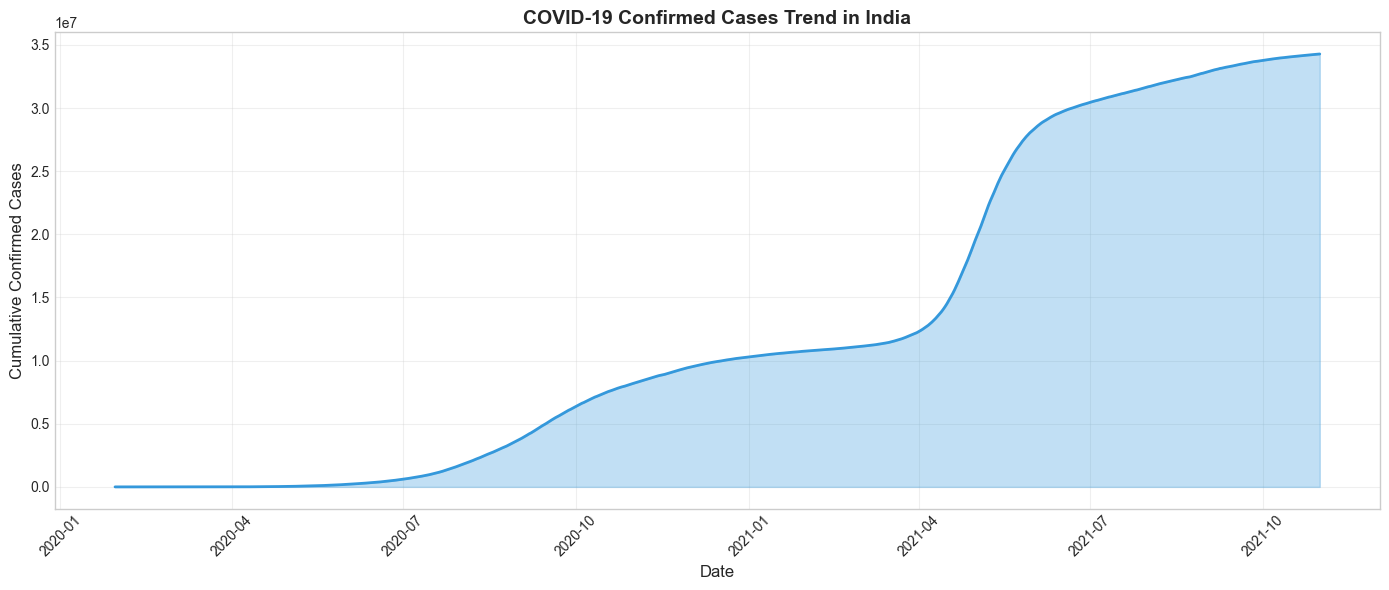

In [16]:
# Plot daily confirmed cases trend from states data
if states_clean is not None:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    daily = states_clean.groupby('Date')['Confirmed'].sum().reset_index()
    
    ax.plot(daily['Date'], daily['Confirmed'], linewidth=2, color=COLORS[0])
    ax.fill_between(daily['Date'], daily['Confirmed'], alpha=0.3, color=COLORS[0])
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Confirmed Cases', fontsize=12)
    ax.set_title('COVID-19 Confirmed Cases Trend in India', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '01_daily_cases_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

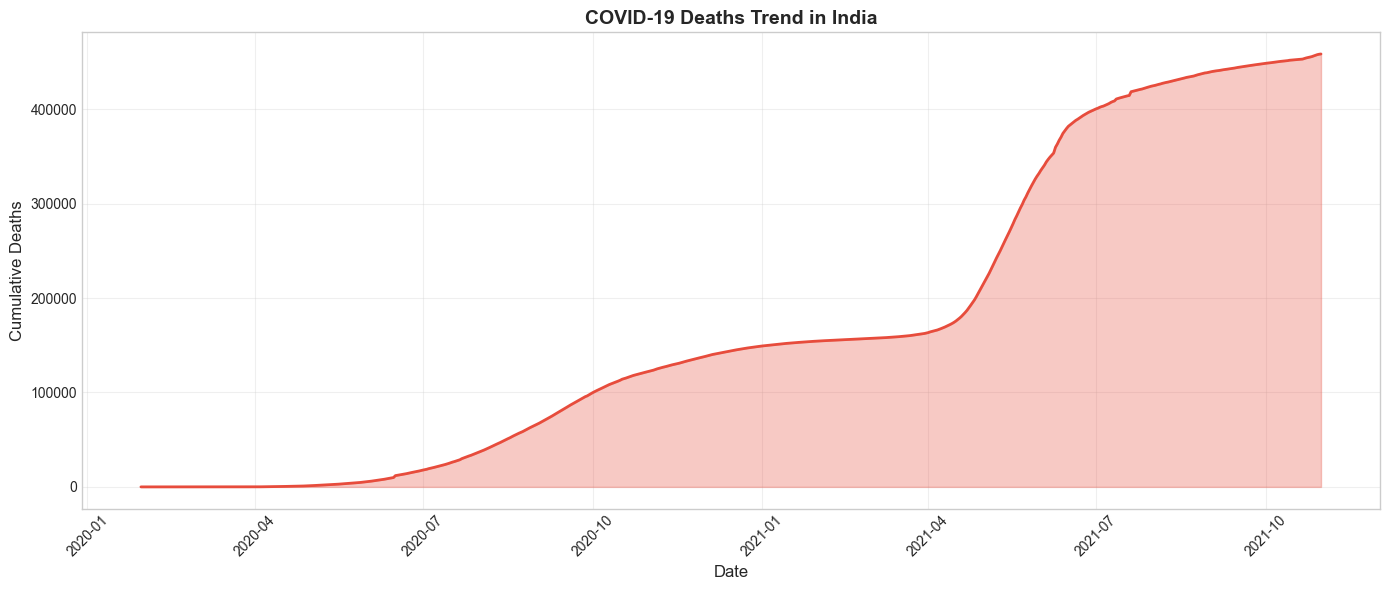

In [17]:
# Plot daily deaths trend
if states_clean is not None:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    daily_deaths = states_clean.groupby('Date')['Deceased'].sum().reset_index()
    
    ax.plot(daily_deaths['Date'], daily_deaths['Deceased'], linewidth=2, color=COLORS[1])
    ax.fill_between(daily_deaths['Date'], daily_deaths['Deceased'], alpha=0.3, color=COLORS[1])
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Deaths', fontsize=12)
    ax.set_title('COVID-19 Deaths Trend in India', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '02_daily_deaths_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.2 State-wise Analysis

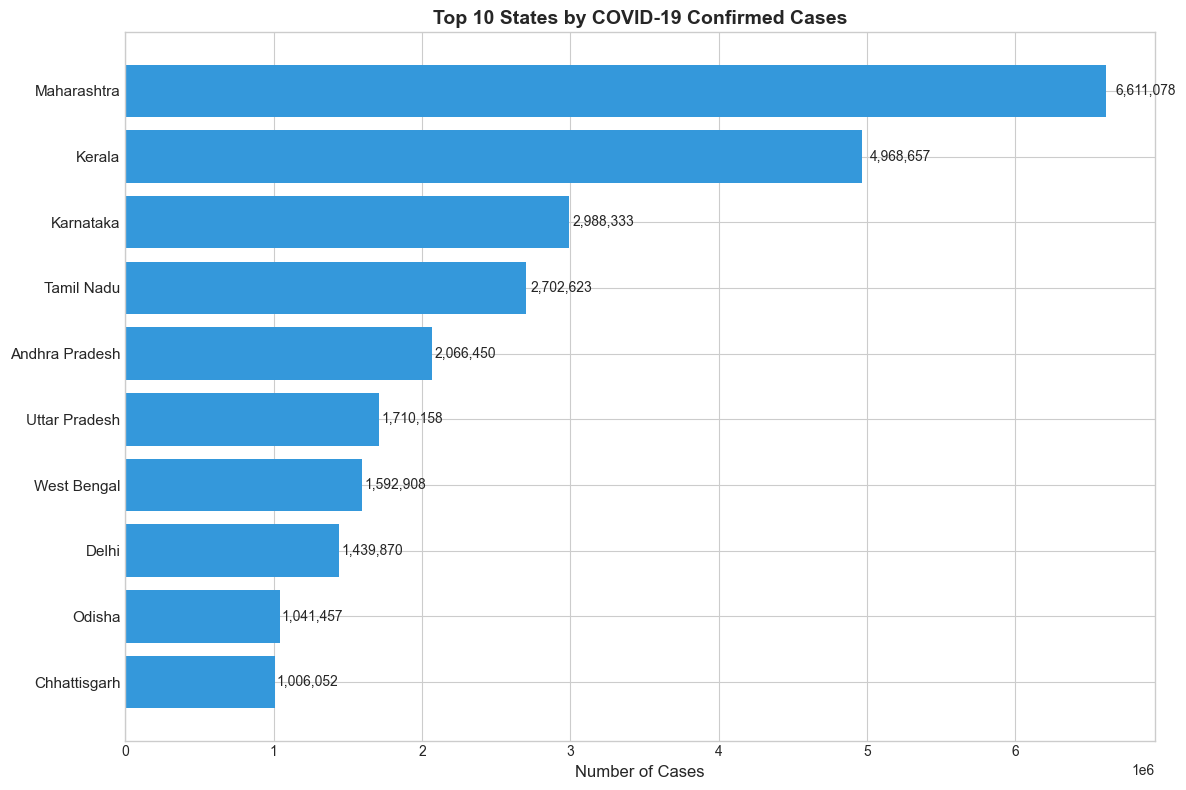

In [18]:
# Top 10 states by confirmed cases
if state_wise_clean is not None:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    top10 = state_wise_clean.nlargest(10, 'Confirmed')
    
    bars = ax.barh(range(len(top10)), top10['Confirmed'].values, color=COLORS[0])
    ax.set_yticks(range(len(top10)))
    ax.set_yticklabels(top10['State'].values, fontsize=11)
    ax.invert_yaxis()
    
    ax.set_xlabel('Number of Cases', fontsize=12)
    ax.set_title('Top 10 States by COVID-19 Confirmed Cases', fontsize=14, fontweight='bold')
    
    for bar, val in zip(bars, top10['Confirmed'].values):
        ax.text(val + val*0.01, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', 
               va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '03_top_states_cases.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

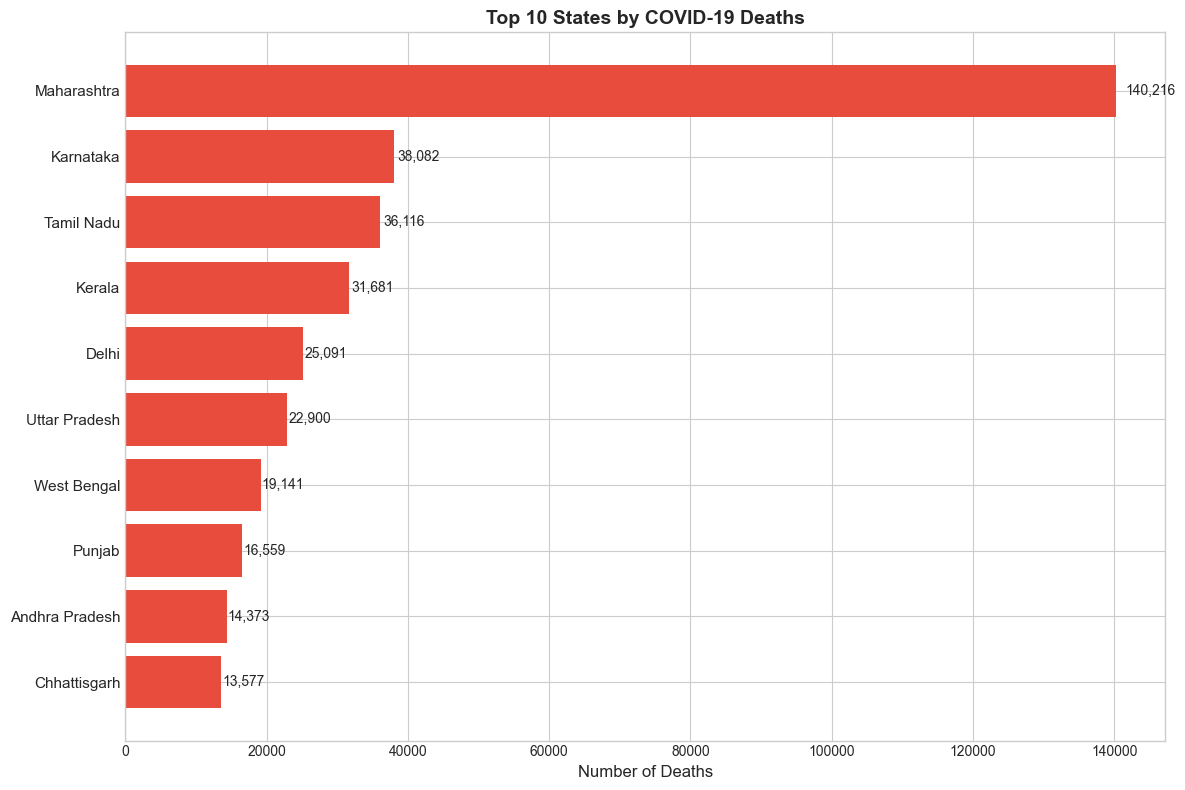

In [19]:
# Top 10 states by deaths
if state_wise_clean is not None:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    top10_deaths = state_wise_clean.nlargest(10, 'Deaths')
    
    bars = ax.barh(range(len(top10_deaths)), top10_deaths['Deaths'].values, color=COLORS[1])
    ax.set_yticks(range(len(top10_deaths)))
    ax.set_yticklabels(top10_deaths['State'].values, fontsize=11)
    ax.invert_yaxis()
    
    ax.set_xlabel('Number of Deaths', fontsize=12)
    ax.set_title('Top 10 States by COVID-19 Deaths', fontsize=14, fontweight='bold')
    
    for bar, val in zip(bars, top10_deaths['Deaths'].values):
        ax.text(val + val*0.01, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', 
               va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '04_top_states_deaths.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.3 Cases, Deaths, and Recoveries Comparison

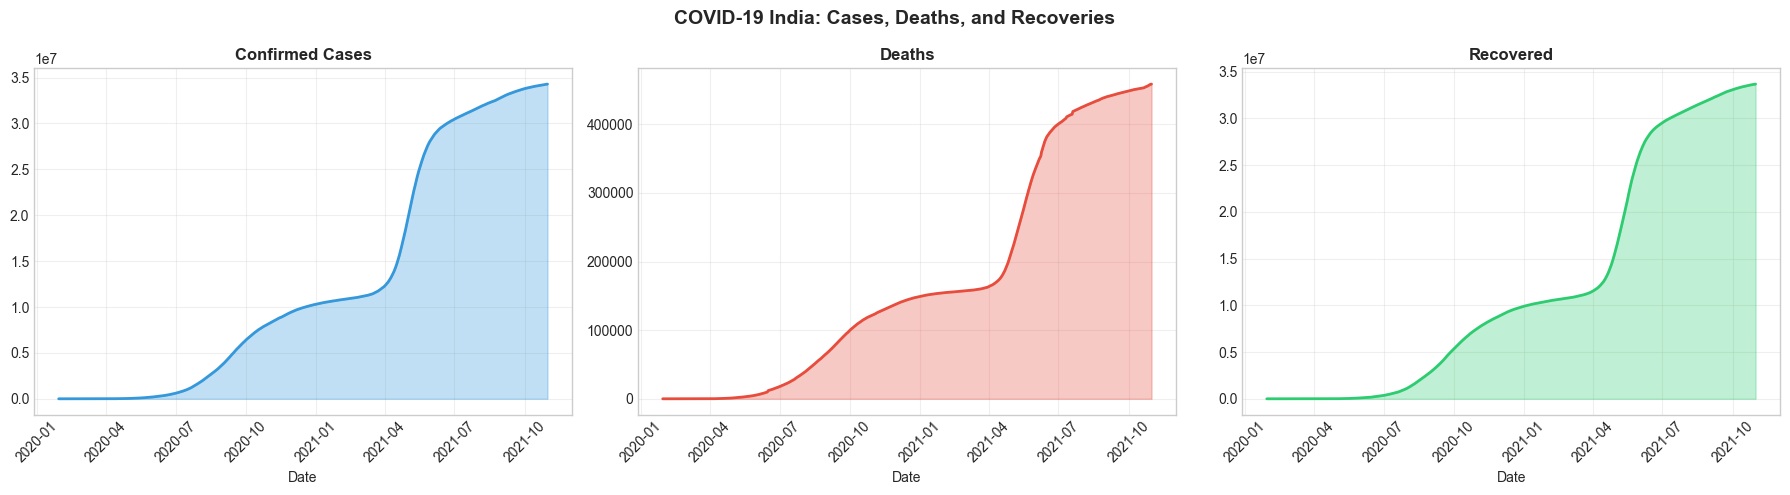

In [20]:
# Combined trend plot
if states_clean is not None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    daily = states_clean.groupby('Date').agg({
        'Confirmed': 'sum',
        'Deceased': 'sum',
        'Recovered': 'sum'
    }).reset_index()
    
    # Confirmed cases
    axes[0].plot(daily['Date'], daily['Confirmed'], color=COLORS[0], linewidth=2)
    axes[0].fill_between(daily['Date'], daily['Confirmed'], alpha=0.3, color=COLORS[0])
    axes[0].set_title('Confirmed Cases', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Date')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # Deaths
    axes[1].plot(daily['Date'], daily['Deceased'], color=COLORS[1], linewidth=2)
    axes[1].fill_between(daily['Date'], daily['Deceased'], alpha=0.3, color=COLORS[1])
    axes[1].set_title('Deaths', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    # Recovered
    axes[2].plot(daily['Date'], daily['Recovered'], color=COLORS[2], linewidth=2)
    axes[2].fill_between(daily['Date'], daily['Recovered'], alpha=0.3, color=COLORS[2])
    axes[2].set_title('Recovered', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Date')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle('COVID-19 India: Cases, Deaths, and Recoveries', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '05_cases_deaths_recovered.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.4 Mortality and Recovery Rates

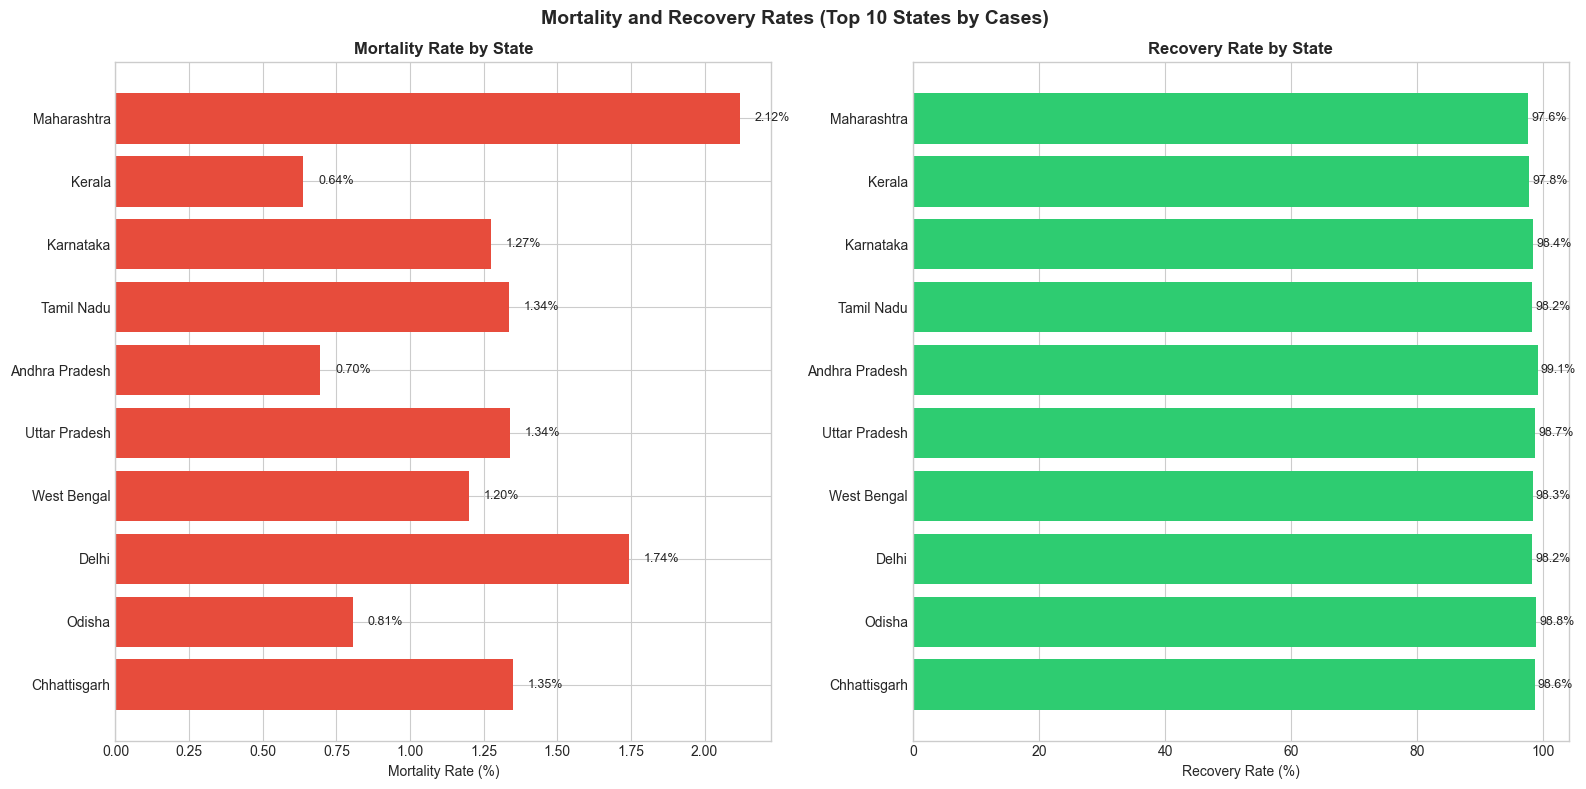

In [21]:
# Mortality and recovery rates by state
if state_wise_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    top10 = state_wise_clean.nlargest(10, 'Confirmed')
    
    # Mortality rate
    bars1 = axes[0].barh(range(len(top10)), top10['Mortality_Rate'].values, color=COLORS[1])
    axes[0].set_yticks(range(len(top10)))
    axes[0].set_yticklabels(top10['State'].values)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Mortality Rate (%)')
    axes[0].set_title('Mortality Rate by State', fontweight='bold')
    
    for bar, val in zip(bars1, top10['Mortality_Rate'].values):
        axes[0].text(val + 0.05, bar.get_y() + bar.get_height()/2, f'{val:.2f}%', va='center', fontsize=9)
    
    # Recovery rate
    bars2 = axes[1].barh(range(len(top10)), top10['Recovery_Rate'].values, color=COLORS[2])
    axes[1].set_yticks(range(len(top10)))
    axes[1].set_yticklabels(top10['State'].values)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Recovery Rate (%)')
    axes[1].set_title('Recovery Rate by State', fontweight='bold')
    
    for bar, val in zip(bars2, top10['Recovery_Rate'].values):
        axes[1].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
    
    plt.suptitle('Mortality and Recovery Rates (Top 10 States by Cases)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '06_mortality_recovery_rates.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.5 Active Cases Distribution

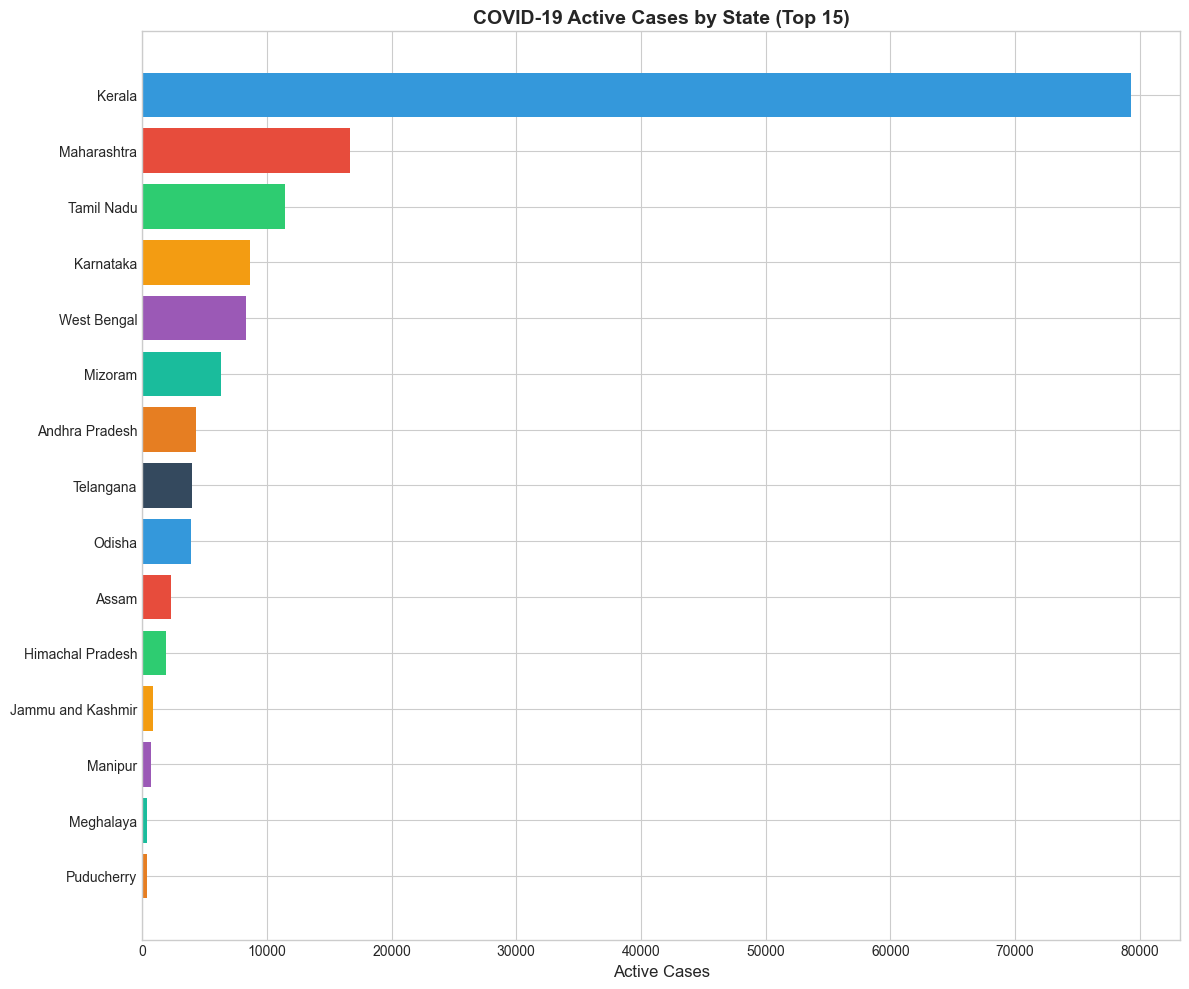

In [22]:
# Active cases by state
if state_wise_clean is not None and 'Active' in state_wise_clean.columns:
    fig, ax = plt.subplots(figsize=(12, 10))
    
    top15_active = state_wise_clean.nlargest(15, 'Active')
    
    colors = [COLORS[i % len(COLORS)] for i in range(len(top15_active))]
    bars = ax.barh(range(len(top15_active)), top15_active['Active'].values, color=colors)
    ax.set_yticks(range(len(top15_active)))
    ax.set_yticklabels(top15_active['State'].values, fontsize=10)
    ax.invert_yaxis()
    
    ax.set_xlabel('Active Cases', fontsize=12)
    ax.set_title('COVID-19 Active Cases by State (Top 15)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '07_active_cases.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.6 State Comparison

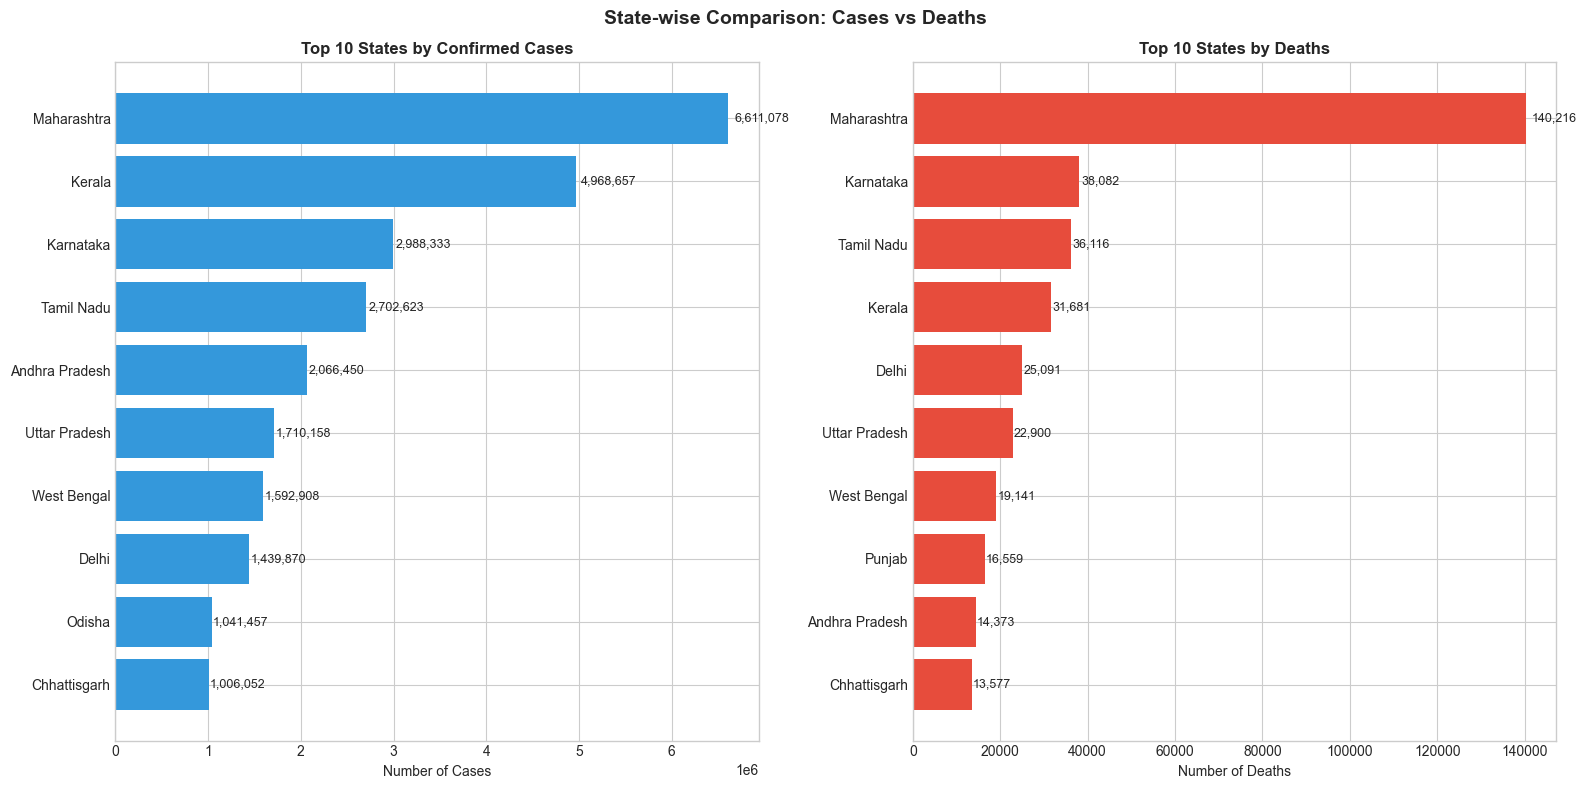

In [23]:
# State comparison: Cases vs Deaths
if state_wise_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    top10_cases = state_wise_clean.nlargest(10, 'Confirmed')
    top10_deaths = state_wise_clean.nlargest(10, 'Deaths')
    
    # Top 10 by cases
    bars1 = axes[0].barh(range(len(top10_cases)), top10_cases['Confirmed'].values, color=COLORS[0])
    axes[0].set_yticks(range(len(top10_cases)))
    axes[0].set_yticklabels(top10_cases['State'].values)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Number of Cases')
    axes[0].set_title('Top 10 States by Confirmed Cases', fontweight='bold')
    
    for bar, val in zip(bars1, top10_cases['Confirmed'].values):
        axes[0].text(val + val*0.01, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=9)
    
    # Top 10 by deaths
    bars2 = axes[1].barh(range(len(top10_deaths)), top10_deaths['Deaths'].values, color=COLORS[1])
    axes[1].set_yticks(range(len(top10_deaths)))
    axes[1].set_yticklabels(top10_deaths['State'].values)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Number of Deaths')
    axes[1].set_title('Top 10 States by Deaths', fontweight='bold')
    
    for bar, val in zip(bars2, top10_deaths['Deaths'].values):
        axes[1].text(val + val*0.01, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=9)
    
    plt.suptitle('State-wise Comparison: Cases vs Deaths', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '08_state_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.7 Overall Distribution

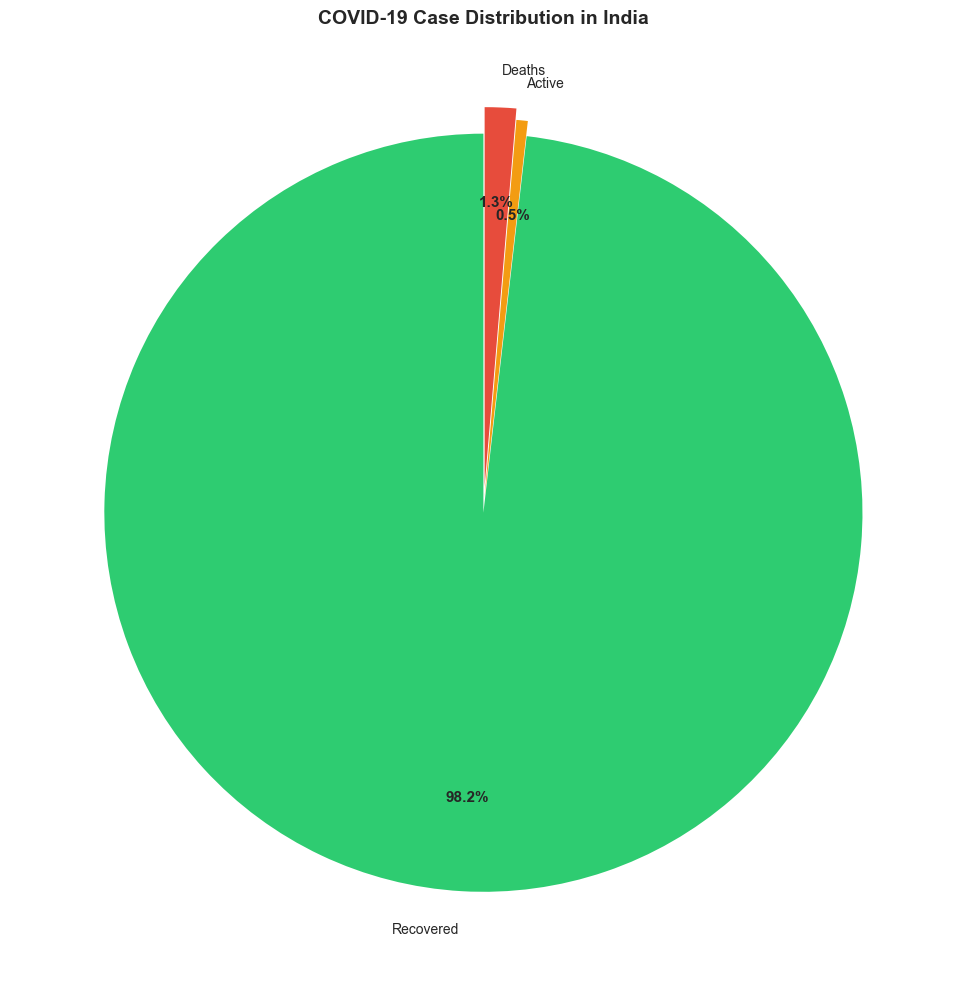

In [24]:
# Pie chart for overall distribution
if state_wise_clean is not None:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    total_confirmed = state_wise_clean['Confirmed'].sum()
    total_deaths = state_wise_clean['Deaths'].sum()
    total_recovered = state_wise_clean['Recovered'].sum()
    total_active = total_confirmed - total_deaths - total_recovered
    
    sizes = [total_recovered, total_active, total_deaths]
    labels = ['Recovered', 'Active', 'Deaths']
    colors = [COLORS[2], COLORS[3], COLORS[1]]
    explode = (0.02, 0.02, 0.05)
    
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                      explode=explode, startangle=90, pctdistance=0.75)
    
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')
    
    ax.set_title('COVID-19 Case Distribution in India', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '09_case_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

## 7. Export Data for Tableau

In [25]:
# Export state-wise cumulative data
if state_wise_clean is not None:
    state_wise_clean.to_csv(TABLEAU_DIR / 'state_wise_tableau.csv', index=False)
    print(f'Exported state-wise data: {len(state_wise_clean)} rows')

Exported state-wise data: 37 rows


In [26]:
# Export daily data
if states_clean is not None:
    daily_data = states_clean.groupby('Date').agg({
        'Confirmed': 'sum',
        'Deceased': 'sum',
        'Recovered': 'sum'
    }).reset_index()
    daily_data.to_csv(TABLEAU_DIR / 'daily_summary_tableau.csv', index=False)
    print(f'Exported daily summary: {len(daily_data)} rows')

Exported daily summary: 613 rows


In [27]:
# Export states time series
if states_clean is not None:
    states_clean.to_csv(TABLEAU_DIR / 'states_timeseries_tableau.csv', index=False)
    print(f'Exported states time series: {len(states_clean)} rows')

Exported states time series: 21062 rows


## 8. Key Findings

In [28]:
print('=' * 60)
print('KEY FINDINGS - COVID-19 INDIA ANALYSIS')
print('=' * 60)

if state_wise_clean is not None:
    total_confirmed = state_wise_clean['Confirmed'].sum()
    total_deaths = state_wise_clean['Deaths'].sum()
    total_recovered = state_wise_clean['Recovered'].sum()
    
    print(f'\n1. OVERALL STATISTICS')
    print(f'   - Total confirmed cases: {total_confirmed:,.0f}')
    print(f'   - Total deaths: {total_deaths:,.0f}')
    print(f'   - Total recovered: {total_recovered:,.0f}')
    print(f'   - Mortality rate: {(total_deaths/total_confirmed)*100:.2f}%')
    print(f'   - Recovery rate: {(total_recovered/total_confirmed)*100:.2f}%')
    
    print(f'\n2. TOP STATE BY CASES')
    top_state = state_wise_clean.nlargest(1, 'Confirmed')
    print(f'   - {top_state["State"].values[0]}: {top_state["Confirmed"].values[0]:,.0f} cases')
    
    print(f'\n3. TOP STATE BY DEATHS')
    top_death_state = state_wise_clean.nlargest(1, 'Deaths')
    print(f'   - {top_death_state["State"].values[0]}: {top_death_state["Deaths"].values[0]:,.0f} deaths')

print('\n4. DATA SOURCES')
print('   - COVID19India.org')
print('   - URL: https://data.covid19india.org/')

print('\n' + '=' * 60)

KEY FINDINGS - COVID-19 INDIA ANALYSIS

1. OVERALL STATISTICS
   - Total confirmed cases: 34,285,612
   - Total deaths: 458,470
   - Total recovered: 33,661,339
   - Mortality rate: 1.34%
   - Recovery rate: 98.18%

2. TOP STATE BY CASES
   - Maharashtra: 6,611,078 cases

3. TOP STATE BY DEATHS
   - Maharashtra: 140,216 deaths

4. DATA SOURCES
   - COVID19India.org
   - URL: https://data.covid19india.org/



## 9. Recommendations

In [29]:
print('RECOMMENDATIONS')
print('-' * 40)
print('''
Based on the analysis, the following recommendations are suggested:

1. FOCUS ON HIGH-CASE STATES
   - Target healthcare resources in states with highest case loads
   - Strengthen hospital infrastructure in affected areas

2. REDUCE MORTALITY RATE
   - Improve critical care facilities
   - Early detection and treatment protocols
   - Ensure adequate oxygen supply

3. MAINTAIN HIGH RECOVERY RATE
   - Continue effective treatment protocols
   - Monitor patient recovery closely
   - Provide follow-up care for recovered patients

4. PREVENTIVE MEASURES
   - Promote vaccination programs
   - Continue public health awareness
   - Maintain testing infrastructure

5. DATA-DRIVEN POLICY MAKING
   - Use state-wise data for targeted interventions
   - Monitor trends for resource allocation
   - Implement early warning systems
''')

RECOMMENDATIONS
----------------------------------------

Based on the analysis, the following recommendations are suggested:

1. FOCUS ON HIGH-CASE STATES
   - Target healthcare resources in states with highest case loads
   - Strengthen hospital infrastructure in affected areas

2. REDUCE MORTALITY RATE
   - Improve critical care facilities
   - Early detection and treatment protocols
   - Ensure adequate oxygen supply

3. MAINTAIN HIGH RECOVERY RATE
   - Continue effective treatment protocols
   - Monitor patient recovery closely
   - Provide follow-up care for recovered patients

4. PREVENTIVE MEASURES
   - Promote vaccination programs
   - Continue public health awareness
   - Maintain testing infrastructure

5. DATA-DRIVEN POLICY MAKING
   - Use state-wise data for targeted interventions
   - Monitor trends for resource allocation
   - Implement early warning systems



## 10. Summary

In [30]:
print('=' * 60)
print('ANALYSIS SUMMARY')
print('=' * 60)
print('''
This analysis examined COVID-19 pandemic data in India using
public datasets from COVID19India.org.

Key aspects covered:
- State-wise confirmed cases and deaths
- Daily and cumulative trend analysis
- Mortality and recovery rate comparison
- Active cases distribution
- State-level comparisons

Outputs generated:
- 9 visualizations (PNG files)
- 3 data exports for Tableau dashboards

Data Source: https://data.covid19india.org/
''')
print('=' * 60)
print('\nAnalysis completed by: Ishak Islam')
print('Internship ID: UMID28072552431')
print('Program: Unified Mentor Internship')
print('=' * 60)

ANALYSIS SUMMARY

This analysis examined COVID-19 pandemic data in India using
public datasets from COVID19India.org.

Key aspects covered:
- State-wise confirmed cases and deaths
- Daily and cumulative trend analysis
- Mortality and recovery rate comparison
- Active cases distribution
- State-level comparisons

Outputs generated:
- 9 visualizations (PNG files)
- 3 data exports for Tableau dashboards

Data Source: https://data.covid19india.org/


Analysis completed by: Ishak Islam
Internship ID: UMID28072552431
Program: Unified Mentor Internship
